In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


In [2]:
# importing training data set
train = pd.read_csv("FB_training_data.csv")


In [3]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,78.580002,78.930000,77.699997,78.449997,78.449997,18177500
1,2015-01-05,77.980003,79.250000,76.860001,77.190002,77.190002,26452200
2,2015-01-06,77.230003,77.589996,75.360001,76.150002,76.150002,27399300
3,2015-01-07,76.760002,77.360001,75.820000,76.150002,76.150002,22045300
4,2015-01-08,76.739998,78.230003,76.080002,78.180000,78.180000,23961000


In [4]:
train = train.iloc[:,1].values

In [5]:
type(train)

numpy.ndarray

In [6]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler

In [7]:
# Defining object 
scalar = MinMaxScaler()

In [8]:
# scaling on the training data
train = scalar.fit_transform(train.reshape(-1,1))

In [9]:
train

array([[0.03204405],
       [0.02780916],
       [0.02251554],
       ...,
       [0.95023996],
       [0.94452287],
       [0.91727837]])

In [10]:
# Data structure for 40 days of data for training and prediction

x_train =[]
y_train =[]

In [11]:

for i in range(40,len(train)):
    x_train.append(train[i-40:i,0])
    y_train.append(train[i,0])

In [12]:
# converting our datasets to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

In [13]:
# shape of our dataset
print(x_train.shape)
y_train.shape

(1218, 40)


(1218,)

In [14]:
#again reshaping the data for RNN
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [15]:
# importing tesnflow libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [16]:
# intializing the sequential object 

rnn = Sequential()

In [17]:
rnn.add(LSTM(units=45,return_sequences = True, input_shape = (x_train.shape[1],1)))

In [18]:
# adding dropout Regularization rate of 20%
rnn.add(Dropout(0.2))


In [19]:
# adding 3 more LSTM layers 

for i in [True,True,False]:
    rnn.add(LSTM(units = 45, return_sequences = i))
    rnn.add(Dropout(0.2))
    

In [20]:
# The output layer

rnn.add(Dense(units = 1))


In [22]:
# compiler 

rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
# fitting the RNN

rnn.fit(x_train,y_train,epochs=100,batch_size=32)

Train on 1218 samples
Epoch 1/100
1218/1218 [==============================] - 17s 14ms/sample - loss: 0.0556
Epoch 2/100
1218/1218 [==============================] - 4s 4ms/sample - loss: 0.0063
Epoch 3/100
1218/1218 [==============================] - 4s 4ms/sample - loss: 0.0064
Epoch 4/100
1218/1218 [==============================] - 5s 4ms/sample - loss: 0.0059
Epoch 5/100
1218/1218 [==============================] - 4s 3ms/sample - loss: 0.0063
Epoch 6/100
1218/1218 [==============================] - 4s 4ms/sample - loss: 0.0057
Epoch 7/100
1218/1218 [==============================] - 4s 4ms/sample - loss: 0.0062
Epoch 8/100
1218/1218 [==============================] - 4s 4ms/sample - loss: 0.0053
Epoch 9/100
1218/1218 [==============================] - 4s 4ms/sample - loss: 0.0056
Epoch 10/100
1218/1218 [==============================] - 4s 4ms/sample - loss: 0.0060
Epoch 11/100
1218/1218 [==============================] - 4s 4ms/sample - loss: 0.0050
Epoch 12/100
1218/1218 [====

Epoch 95/100
1218/1218 [==============================] - 4s 3ms/sample - loss: 0.0018
Epoch 96/100
1218/1218 [==============================] - 5s 4ms/sample - loss: 0.0018
Epoch 97/100
1218/1218 [==============================] - 4s 4ms/sample - loss: 0.0018
Epoch 98/100
1218/1218 [==============================] - 4s 3ms/sample - loss: 0.0015
Epoch 99/100
1218/1218 [==============================] - 4s 4ms/sample - loss: 0.0017
Epoch 100/100
1218/1218 [==============================] - 4s 4ms/sample - loss: 0.0015


## Prediction 

In [25]:
# Importing Test dataset

test = pd.read_csv("FB_test_data.csv")
test =test.iloc[:,1].values

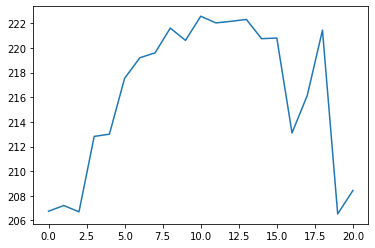

In [26]:
# plotting the test dataset
plt.plot(test)

In [30]:
# reimporitng the dataset to take previous 40 days data than Jan 2020

unscaled_train = pd.read_csv("FB_training_data.csv")

unscaled_test = pd.read_csv("FB_test_data.csv")

In [31]:
# concatnating train and test data only for the column OPEN

all_data = pd.concat((unscaled_train['Open'],unscaled_test['Open']),axis=0)



In [32]:
all_data.shape

(1279,)

In [33]:
# getting data of 40 days prior to january 2020

x_test_data = all_data[len(all_data)-len(test)-40:].values


In [34]:
x_test_data.shape

(61,)

In [35]:
# resahping the test dataset
x_test_data = np.reshape(x_test_data,(-1,1))

In [37]:
# scaling the test dataset
x_test_data = scalar.transform(x_test_data)

In [38]:
final_x_test_data = []

for i in range(40,len(x_test_data)):
    final_x_test_data.append(x_test_data[i-40:i,0])
final_x_test_data = np.array(final_x_test_data)

In [39]:
final_x_test_data = np.reshape(final_x_test_data, (final_x_test_data.shape[0], 

                                               final_x_test_data.shape[1], 

                                               1))

In [42]:
# prediction

predictions = rnn.predict(final_x_test_data)

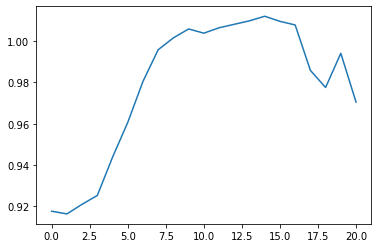

In [44]:
plt.clf()
plt.plot(predictions)

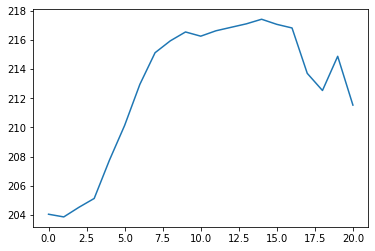

In [46]:
# unscaling the data 

unscaled_predictions = scalar.inverse_transform(predictions)

plt.clf() 

plt.plot(unscaled_predictions)

Text(0.5, 1.0, 'Facebook Stock Price Predictions')

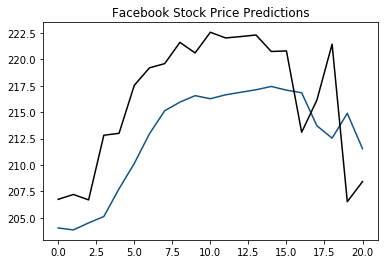

In [48]:
# comparision

plt.plot(unscaled_predictions, color = '#135485', label = "Predictions")

plt.plot(test, color = 'black', label = "Real Data")

plt.title('Facebook Stock Price Predictions')